<a href="https://colab.research.google.com/github/AnandShegde/pml_baselines/blob/main/RStanColab/RStan_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

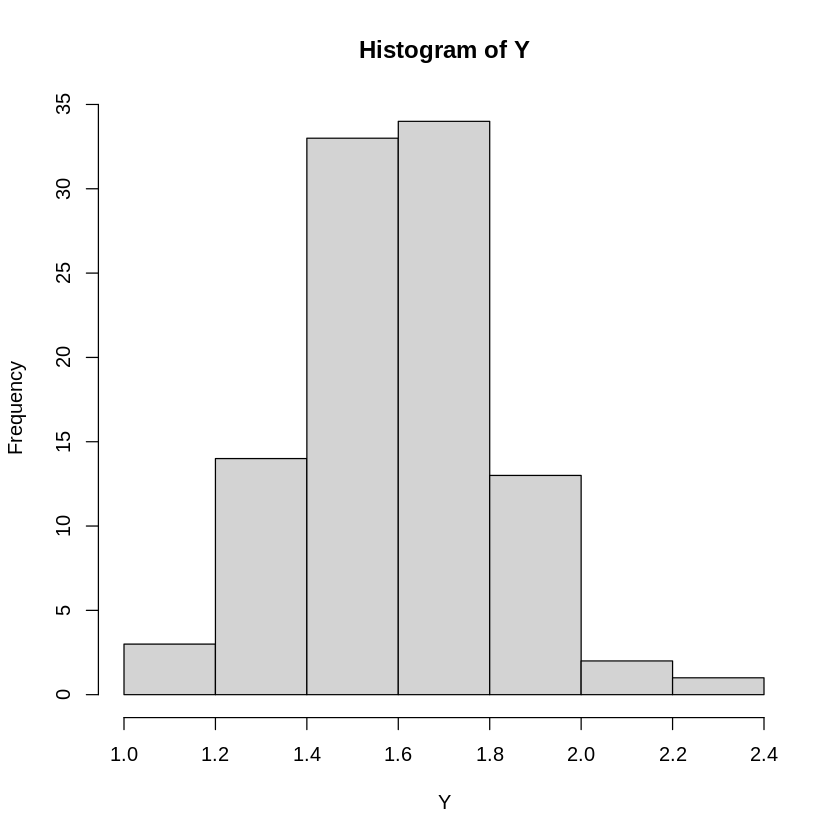

In [1]:
N<-100
Y<-rnorm(N,1.6,0.2)
hist(Y)

In [2]:
Sys.setenv(PATH= paste("/conda/bin" , Sys.getenv("PATH"), sep = ":" ) )
install.packages('ggmap', repos='http://cran.rstudio.com/')

install.packages('codetools', repos='http://cran.rstudio.com/')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘RgoogleMaps’, ‘png’, ‘plyr’, ‘rjson’, ‘jpeg’, ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
Sys.setenv(MAKEFLAGS= paste0("-j",parallel::detectCores()))
# after that we'll install rstan in R folder on the Google server (see lib parameter)
install.packages("rstan", dependencies = T, repos = "https://cloud.r-project.org", lib = "/usr/lib/R/library",)

also installing the dependencies ‘lazyeval’, ‘numDeriv’, ‘httpuv’, ‘fontawesome’, ‘sourcetools’, ‘later’, ‘promises’, ‘htmlwidgets’, ‘miniUI’, ‘crosstalk’, ‘zoo’, ‘igraph’, ‘abind’, ‘tensorA’, ‘distributional’, ‘checkmate’, ‘matrixStats’, ‘shiny’, ‘colourpicker’, ‘DT’, ‘dygraphs’, ‘gtools’, ‘markdown’, ‘reshape2’, ‘shinyjs’, ‘shinythemes’, ‘threejs’, ‘xtable’, ‘xts’, ‘ggridges’, ‘posterior’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘RcppParallel’, ‘loo’, ‘RcppEigen’, ‘BH’, ‘RUnit’, ‘shinystan’, ‘bayesplot’, ‘rstantools’, ‘V8’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [5]:
library(rstan)
model<-stan_model("/content/RStan/CoinToss.stan")

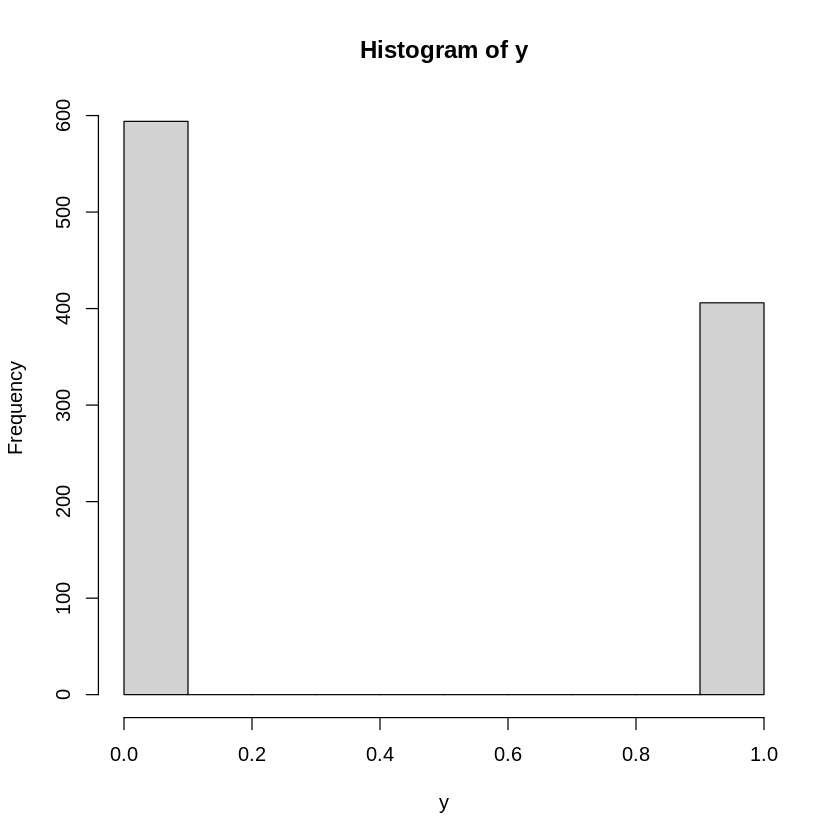

In [8]:
n <- 1000
theta<-0.4
y <- rbinom(n,size=1,prob=theta)
hist(y)

yhat<-mean(y)
alpha0 <- 10
beta0 <- 15
alpha_n<-sum(y)+alpha0
beta_n<-n-sum(y)+beta0

x = seq(0, 1, 1 / 1000)
f_y1 <- dbeta(x, shape1 = alpha0, shape2 = beta0)
f_y2 <- dbeta(x, shape1 = alpha_n, shape2 = beta_n)

In [9]:
fit2<-vb(model,data=list(n=n,y=y,alpha0=alpha0,beta0=beta0))

Chain 1: ------------------------------------------------------------
Chain 1: EXPERIMENTAL ALGORITHM:
Chain 1:   This procedure has not been thoroughly tested and may be unstable
Chain 1:   or buggy. The interface is subject to change.
Chain 1: ------------------------------------------------------------
Chain 1: 
Chain 1: 
Chain 1: 
Chain 1: Gradient evaluation took 1.2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.12 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Begin eta adaptation.
Chain 1: Iteration:   1 / 250 [  0%]  (Adaptation)
Chain 1: Iteration:  50 / 250 [ 20%]  (Adaptation)
Chain 1: Iteration: 100 / 250 [ 40%]  (Adaptation)
Chain 1: Iteration: 150 / 250 [ 60%]  (Adaptation)
Chain 1: Iteration: 200 / 250 [ 80%]  (Adaptation)
Chain 1: Success! Found best value [eta = 1] earlier than expected.
Chain 1: 
Chain 1: Begin stochastic gradient ascent.
Chain 1:   iter             ELBO   delta_ELBO_mea

In [10]:
fit<-sampling(model,list(n=n,y=y,alpha0=alpha0,beta0=beta0),iter=1500,chains=8,warmup=500)
print(fit)


SAMPLING FOR MODEL 'CoinToss' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.1e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.11 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 1500 [  0%]  (Warmup)
Chain 1: Iteration:  150 / 1500 [ 10%]  (Warmup)
Chain 1: Iteration:  300 / 1500 [ 20%]  (Warmup)
Chain 1: Iteration:  450 / 1500 [ 30%]  (Warmup)
Chain 1: Iteration:  501 / 1500 [ 33%]  (Sampling)
Chain 1: Iteration:  650 / 1500 [ 43%]  (Sampling)
Chain 1: Iteration:  800 / 1500 [ 53%]  (Sampling)
Chain 1: Iteration:  950 / 1500 [ 63%]  (Sampling)
Chain 1: Iteration: 1100 / 1500 [ 73%]  (Sampling)
Chain 1: Iteration: 1250 / 1500 [ 83%]  (Sampling)
Chain 1: Iteration: 1400 / 1500 [ 93%]  (Sampling)
Chain 1: Iteration: 1500 / 1500 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.007251 seconds (Warm-up)
Chain 1:                0.012283 seconds (Sampling)
Chain 1:            

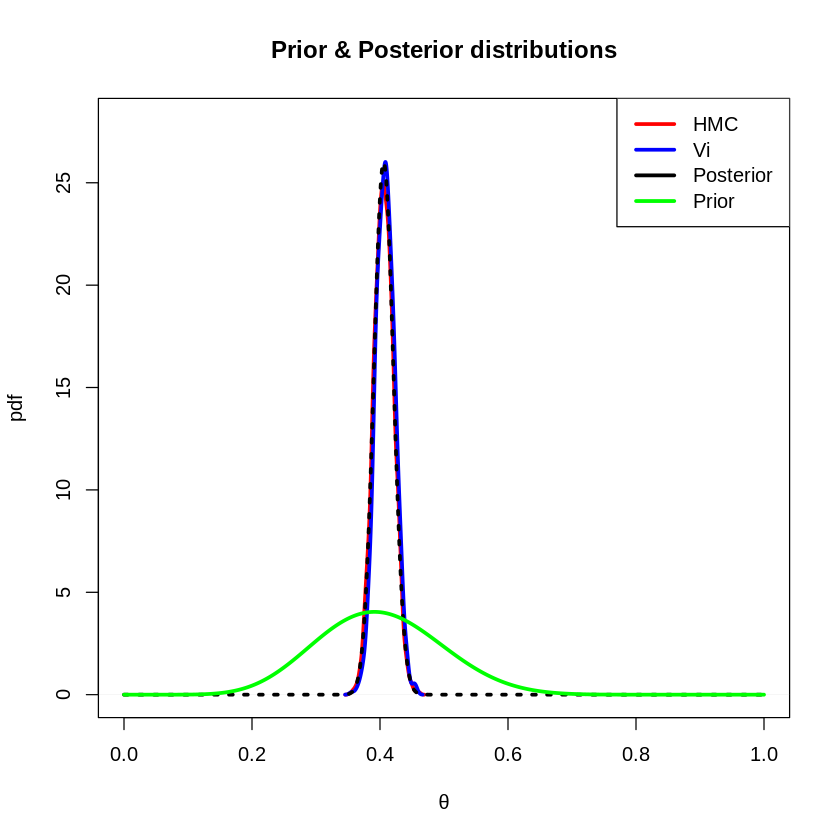

In [36]:
params=extract(fit)
params2=extract(fit2)
plot(density(params$theta),main="Prior & Posterior distributions",type = "l",col="red",xlab = expression(theta), ylab = "pdf",xlim=c(0,1),lwd=3,ylim=c(0,28))
lines(density(params2$theta),col="blue",lwd=3)
lines(x,f_y2,col="black",lwd=3,lty=3)
lines(x,f_y1,type="l",col="green",lwd=3)
legend("topright", c("HMC","Vi","Posterior","Prior"), lwd = 3, col = c("red","blue","black","green"))

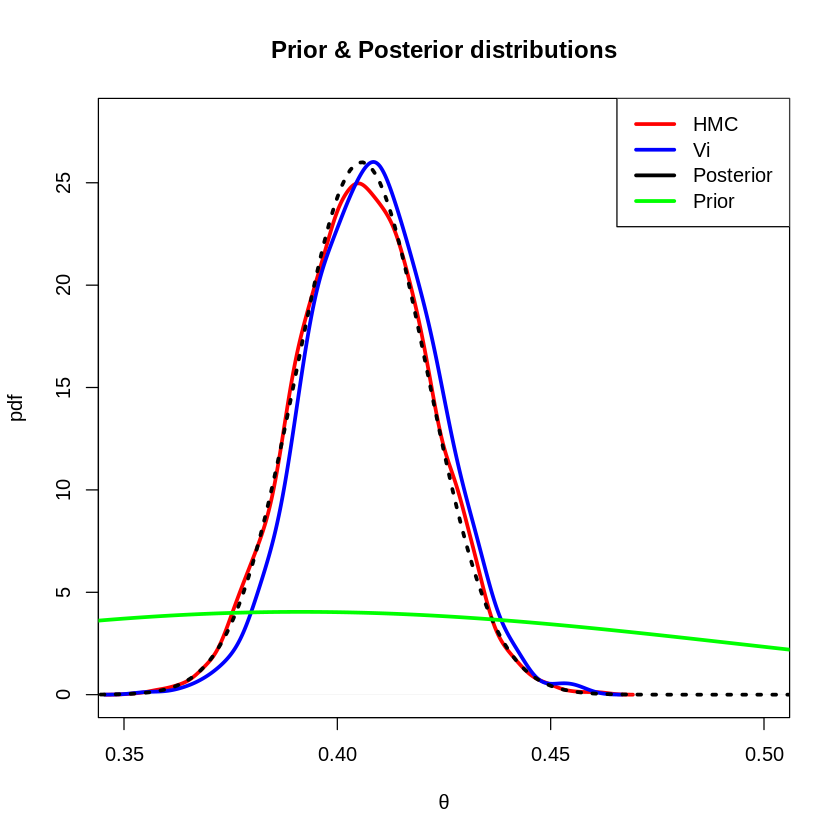

In [38]:
params=extract(fit)
params2=extract(fit2)
plot(density(params$theta),main="Prior & Posterior distributions",type = "l",col="red",xlab = expression(theta), ylab = "pdf",xlim=c(0.35,0.5),lwd=3,ylim=c(0,28))
lines(density(params2$theta),col="blue",lwd=3)
lines(x,f_y2,col="black",lwd=3,lty=3)
lines(x,f_y1,type="l",col="green",lwd=3)
legend("topright", c("HMC","Vi","Posterior","Prior"), lwd = 3, col = c("red","blue","black","green"))
